In [2]:
###########################################################################
#
#    Coin-Game
#    @Author: Tjark Ziehm
#    @Theme: learn true randomness
#
#    @additioal Information: https://qutip.org/
#
###########################################################################

In [1]:
####################################---IMPORT---##########################
# hit "shift + Enter" to execute this cell
# loading some basic functions needed for the game
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, BasicAer
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from ipywidgets import interact

In [2]:
import numpy as np
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit import IBMQ

In [5]:
##################################---LOGIN---############################


In [4]:
key = 'YOUR_KEY'

IBMQ.save_account(key)
account = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_belem')

configrc.store_credentials:WARNING:2021-11-04 15:56:16,639: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-11-04 15:56:17,253: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
# hit "shift + Enter" to execute this cell
# auxillary functions for the coin moves

def MoveA1(move_A1): global moveA1; moveA1=move_A1;
def MoveB1(move_B1): global moveB1; moveB1=move_B1;
def MoveA2(move_A2): global moveA2; moveA2=move_A2;

In [8]:
# hit "shift + Enter" to execute this cell
# auxillary function to  the winner

def who_wins(counts):
    if len(counts)==1 :
        print('The winner is', 'A' if ("0" in counts) else 'B')
    else:
        count0=counts["0"]
        count1=counts["1"]
        print('The coin is in superposition of |0⟩ and |1⟩')
        print('A wins with probability',  "%.1f%%" % (100.*count0/(count0+count1)))
        print('B wins with probability',  "%.1f%%" % (100.*count1/(count0+count1)))
    return()

In [9]:
# hit "shift + Enter" to execute this cell
# then make your choice using the drop-down widget
interact(MoveA1, move_A1={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_A1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

In [10]:


# hit "shift + Enter" to execute this cell 
# you might need to click the cell, first, to activate it
# then make your choice using the drop-down widget
interact(MoveB1, move_B1={'id Gate':0,'X Gate':1});



interactive(children=(Dropdown(description='move_B1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

In [11]:


# hit "shift + Enter" to execute this cell
# you might need to click the cell, first, to activate it
# then make your choice using the drop-down widget
interact(MoveA2, move_A2={'id Gate':0,'X Gate':1})

<function __main__.MoveA2(move_A2)>

In [12]:
# optional: print the three moves. 
# 0: id Gate (leave the coin unchanged), 1: X Gate (turn the coin)
print(moveA1, moveB1, moveA2)

0 0 0


In [13]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend

# 1. move of A
qc.id(q[0]) if (moveA1 == 0) else qc.x(q[0]) 
    
# 1. move of B 
qc.id(q[0]) if (moveB1 == 0) else qc.x(q[0])      

# 2. move of A
qc.id(q[0]) if (moveA2 == 0) else qc.x(q[0]) 
    
qc.measure(q, c) # Measure the qubits
qc.draw() # plot the circuit

┌───┐┌───┐┌───┐┌─┐
q0_0: ┤ I ├┤ I ├┤ I ├┤M├
      └───┘└───┘└───┘└╥┘
c0: 1/════════════════╩═
                      0

In [14]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner

{'0': 200}
The winner is A


In [15]:


interact(MoveA1, move_A1={'id Gate':0,'X Gate':1, 'H Gate':2});



interactive(children=(Dropdown(description='move_A1', options={'id Gate': 0, 'X Gate': 1, 'H Gate': 2}, value=…

In [16]:
interact(MoveB1, move_B1={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_B1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

In [17]:


interact(MoveA2, move_A2={'id Gate':0,'X Gate':1, 'H Gate':2});



interactive(children=(Dropdown(description='move_A2', options={'id Gate': 0, 'X Gate': 1, 'H Gate': 2}, value=…

In [18]:
# optional: print the three moves. 
# 0: id Gate (leave the coin unchanged), 1: X Gate (turn the coin), 2: H Gate
print(moveA1, moveB1, moveA2)

0 0 0


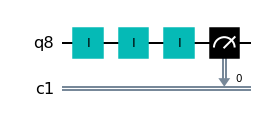

In [19]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend

# 1. move of A
if   moveA1 == 0 : qc.id(q[0])
elif moveA1 == 1 : qc.x(q[0]) 
elif moveA1 == 2 : qc.h(q[0]) 
    
# 1. move of B 
if   moveB1 == 0 : qc.id(q[0])
elif moveB1 == 1 : qc.x(q[0])     

# 2. move of A
if   moveA2 == 0 : qc.id(q[0])
elif moveA2 == 1 : qc.x(q[0]) 
elif moveA2 == 2 : qc.h(q[0]) 

qc.measure(q, c) # Measure the qubits
qc.draw(output='mpl') # plot the circuit


{'0': 200}
The winner is A


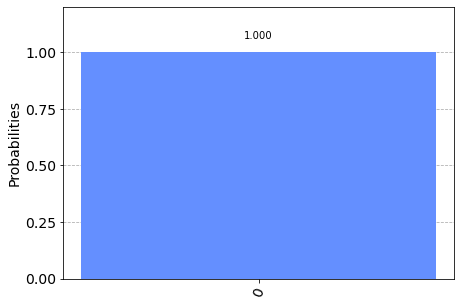

In [21]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner

plot_histogram(counts) # Visualise the results

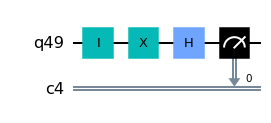

In [26]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend


# define the quantum gates (=coin moves) as you like
# you could also try change the number of moves to just 1 or 2
#qc.id(q[0])
#qc.x(q[0]) 
#qc.h(q[0]) 

qc.id(q[0])
qc.x(q[0]) 
qc.h(q[0])

qc.measure(q, c) # Measure the qubits
qc.draw(output='mpl') # plot the circuit

{'0': 110, '1': 90}


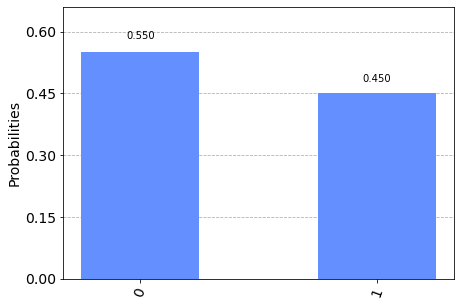

In [27]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs

plot_histogram(counts) # Visualise the results